In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [3]:
%matplotlib inline

In [333]:
df1 = pd.read_pickle("/Users/liyannie/Desktop/Sp_2019_courses/DS_Indus/project/liyan/df1.pkl")

In [0]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
0,2,2016-05-02 08:15:03+00:00,2016-05-02 08:25:42+00:00,5,1.38,-73.961136,40.775322,1,N,-73.972694,...,999.9,59.0,44.6,0.16,999.9,0,0,0,0,0
1,2,2016-10-22 15:07:08+00:00,2016-10-22 15:21:15+00:00,1,1.30,NaN,NaN,1,N,NaN,...,27.0,66.0,46.4,1.32,999.9,0,1,0,0,0
2,1,2016-08-26 17:23:09+00:00,2016-08-26 18:13:32+00:00,1,22.10,NaN,NaN,1,Y,NaN,...,999.9,89.6,75.2,0.01,999.9,0,0,0,0,0
3,2,2016-02-13 13:44:09+00:00,2016-02-13 13:52:08+00:00,1,1.33,-73.999458,40.743900,1,N,-74.007759,...,31.1,27.0,9.0,0.00,999.9,0,0,0,0,0
4,2,2016-02-12 15:26:00+00:00,2016-02-12 15:55:24+00:00,1,3.94,-73.968292,40.767811,1,N,-73.981239,...,25.1,30.9,15.1,0.00,999.9,0,0,0,0,0


# 2. Basic data cleaning

## Missing values

- taxi data: about 50% of the data with missing values, remove them
- weather data: 
 - visib = 999.9 (2% missing, remove rows)
 - wdsp = 999.9 (3% missing, remove rows)
 - gust = 999.9 (28% missing, remove rows)
 - sndp = 999.9 (94% missing, remove variable)

In [142]:
def missing_ratio(data):
    na = (data.isnull().sum() / len(data)) * 100
    na = na.drop(na[na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'missing_ratio' :na})
    return missing_data

In [143]:
miss_df = missing_ratio(df1)

In [144]:
miss_df

,missing_ratio
dropoff_latitude,47.11865
dropoff_longitude,47.11865
pickup_latitude,47.11865
pickup_longitude,47.11865


In [335]:
df1 = df1.dropna()

In [308]:
df1.shape

(1057627, 41)

In [230]:
(df1['visib'] == 999.9).sum() / len(df1) * 100

2.301756668466293

In [221]:
df1["wdsp"] = df1["wdsp"].astype(float)

In [31]:
(df1['wdsp'] == 999.9).sum() / len(df1) * 100

2.8689698731216207

In [32]:
(df1['gust'] == 999.9).sum() / len(df1) * 100

28.17184130132835

In [33]:
(df1['sndp'] == 999.9).sum() / len(df1) * 100

94.42421572066523

In [34]:
(df1['rate_code'] == 99).sum() / len(df1) * 100

0.014750001654647621

In [231]:
df = pd.DataFrame(columns=['missing_ratio'], index=['visib','wdsp','gust', 'sndp'])
df.loc['visib'] = (df1['visib'] == 999.9).sum() / len(df1) * 100
df.loc['wdsp'] = (df1['wdsp'] == 999.9).sum() / len(df1) * 100
df.loc['gust'] = (df1['gust'] == 999.9).sum() / len(df1) * 100
df.loc['sndp'] = (df1['sndp'] == 999.9).sum() / len(df1) * 100

In [223]:
df

,missing_ratio
visib,2.30176
wdsp,2.86897
gust,28.1718
sndp,94.4242


In [336]:
def remove(df):
    df = df[df['visib'] != 999.9]
    df = df[df['wdsp'] != 999.9]
    df = df[df['gust'] != 999.9]
    df = df[df['rate_code'] != 99]
    df = df.loc[:, df.columns != 'sndp']
    return df

In [310]:
# remove rows with missing values in training set
df1 = remove(df1)

In [256]:
df1.shape

(759527, 40)

## Outliers: extremely important. Otherwise relationships won't show

In [40]:
df1.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,...,day_of_year,month_of_year,year_of_year,temp,visib,wdsp,gust,max,min,prcp
count,759527.000000,7.595270e+05,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,...,759527.000000,759527.000000,759527.0,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000,759527.000000
mean,1.659917,-1.149021e+00,-72.894140,40.156113,1.038166,-72.960995,40.193869,12.761755,0.332754,0.497545,...,15.018627,3.105844,2016.0,47.390033,9.157611,5.880270,21.494910,58.177904,38.812758,0.102255
std,1.310160,3.903826e+03,8.871795,4.887086,0.282600,8.596447,4.735533,11.078733,0.435076,0.038093,...,8.806481,1.566945,0.0,14.490393,1.360463,1.852188,5.488963,15.535456,13.629933,0.237084
min,0.000000,-3.390584e+06,-121.933350,0.000000,1.000000,-121.933456,0.000000,-160.000000,-4.500000,-0.500000,...,1.000000,1.000000,2016.0,6.900000,1.700000,2.000000,14.000000,21.900000,-0.900000,0.000000
25%,1.000000,1.000000e+00,-73.991730,40.736092,1.000000,-73.991226,40.734558,6.500000,0.000000,0.500000,...,7.000000,2.000000,2016.0,37.400000,8.800000,4.500000,17.100000,46.900000,30.000000,0.000000
50%,1.000000,1.700000e+00,-73.981529,40.753330,1.000000,-73.979523,40.753864,9.500000,0.000000,0.500000,...,14.000000,3.000000,2016.0,47.300000,9.900000,5.600000,20.000000,57.900000,37.900000,0.000000
75%,2.000000,3.140000e+00,-73.966461,40.767971,1.000000,-73.962074,40.769459,14.500000,0.500000,0.500000,...,23.000000,4.000000,2016.0,55.100000,10.000000,6.700000,24.100000,69.100000,46.900000,0.070000
max,8.000000,2.810603e+05,0.000000,43.017578,6.000000,0.000000,43.327618,1411.000000,26.000000,4.300000,...,31.000000,6.000000,2016.0,79.600000,10.000000,12.800000,39.000000,91.900000,71.100000,1.820000


### passenger_count
- According to the above, there are obs with passenger_count = 0. 
- Remove those.

In [337]:
df1 = df1[df1['passenger_count'] != 0]

In [243]:
df1.shape

(759492, 40)

### longitude, latitude
- pickup & dropoff latitude: between 40.6 and 40.9
- pickup & dropoff longitude: between -74.05 and -73.7

In [338]:
df1 = df1[(df1['pickup_latitude'] > 40.06) & (df1['pickup_latitude'] < 40.9)]
df1 = df1[(df1['dropoff_latitude'] > 40.06) & (df1['dropoff_latitude'] < 40.9)]
df1 = df1[(df1['pickup_longitude'] > -74.05) & (df1['pickup_longitude'] < -73.7)]
df1 = df1[(df1['dropoff_longitude'] > -74.05) & (df1['pickup_longitude'] < -73.7)]

In [261]:
df1.shape

(740457, 40)

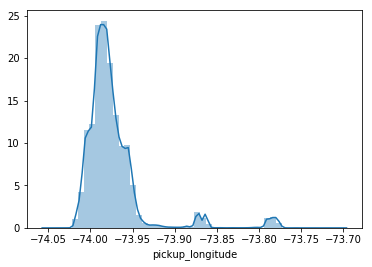

In [47]:
sns.distplot(df1['pickup_longitude'])

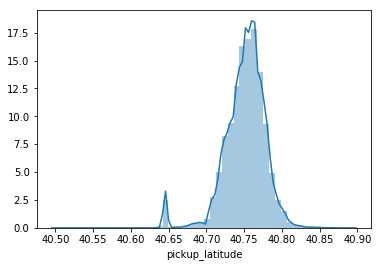

In [48]:
sns.distplot(df1['pickup_latitude'])

### travel_time
- According to the above chart, there are negatie values also huge values for travel_time
- Only keep those between 10s to 86400s (24hr)

In [339]:
df1 = df1[(df1['travel_time'] > 30) & (df1['travel_time'] < 7200)]

In [314]:
df1.shape

(741264, 40)

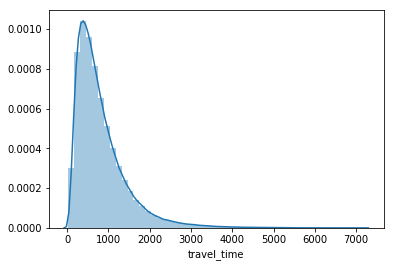

In [315]:
sns.distplot(df1['travel_time'],
            axlabel='travel_time')

# 3. Identify features 

## Information leakage
- trip_distance
- fare_amount
- total_amount
- payment_type
- extra
- mta_tax
- tip_amount
- tolls_amount
- imp_surcharge

Because they are causal with travel_time, or the payment information we would not know at the time of prediction (because it happens at the end of the trip)

In [316]:
df1 = df1.drop(labels = ['trip_distance',
                         'fare_amount',
                         'total_amount',
                         'payment_type',
                         'extra',
                         'mta_tax',
                         'tip_amount',
                         'tolls_amount',
                         'imp_surcharge',
                         'dropoff_datetime'], 
               axis = 1)

## Redundant/unnecessary features
- year
- day_of_year
- month_of_year
- year_of_year	
- date_of_year2
- vendor_id (does not exist in test set)
- rate_code (does not exist in test set)
- store_and_fwd_flag (does not exist in test set)

In [317]:
df1 = df1.drop(labels = ['year', 'day_of_year','month_of_year',
                         'year_of_year','date_of_year2','vendor_id',
                        'rate_code', 'store_and_fwd_flag'],
               axis = 1)

In [318]:
df1.shape

(741264, 22)

In [202]:
#final_test.shape

(694047, 21)

## Visualize relationship between y and each x

In [330]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741264 entries, 3 to 19198
Data columns (total 20 columns):
pickup_datetime      741264 non-null datetime64[ns, UTC]
passenger_count      741264 non-null int64
pickup_longitude     741264 non-null float64
pickup_latitude      741264 non-null float64
dropoff_longitude    741264 non-null float64
dropoff_latitude     741264 non-null float64
travel_time          741264 non-null int64
date_of_year         741264 non-null datetime64[ns]
mo                   741264 non-null object
da                   741264 non-null object
temp                 741264 non-null float64
visib                741264 non-null float64
wdsp                 741264 non-null object
gust                 741264 non-null float64
max                  741264 non-null float64
min                  741264 non-null float64
prcp                 741264 non-null float64
fog                  741264 non-null object
rain_drizzle         741264 non-null object
snow_ice_pellets     7412

### Boxplots

In [319]:
box = df1[['passenger_count',  'mo', 'da', 'fog', 'rain_drizzle', 'visib', 'gust',
          'snow_ice_pellets', 'hail', 'thunder']]

In [75]:
box.head()

,passenger_count,mo,da,fog,rain_drizzle,visib,gust,snow_ice_pellets,hail,thunder
3,1,02,13,0,0,10.0,31.1,0,0,0
4,1,02,12,0,0,10.0,25.1,0,0,0
10,5,06,05,1,1,5.4,33.0,0,0,0
14,2,02,13,0,0,10.0,31.1,0,0,0
19,1,06,05,1,1,5.4,33.0,0,0,0


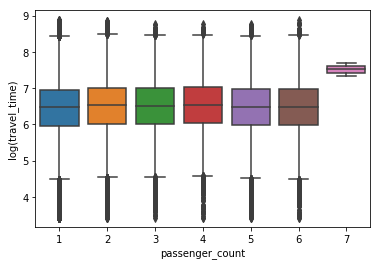

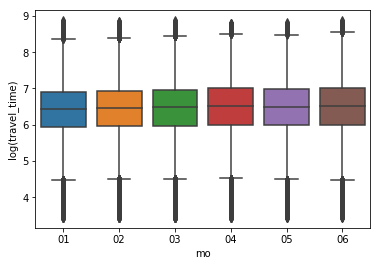

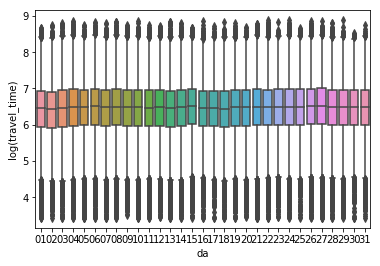

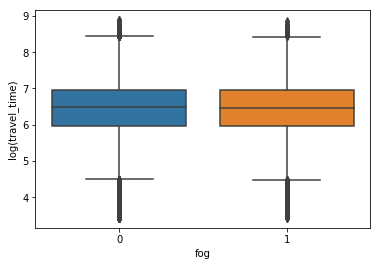

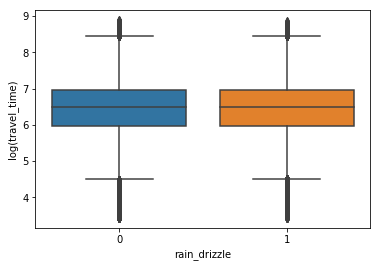

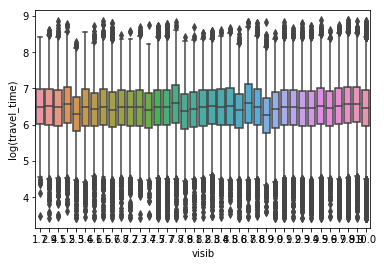

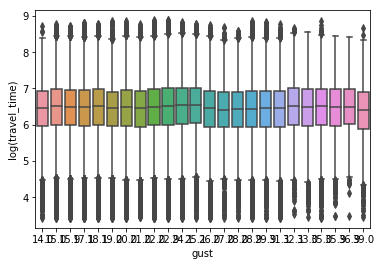

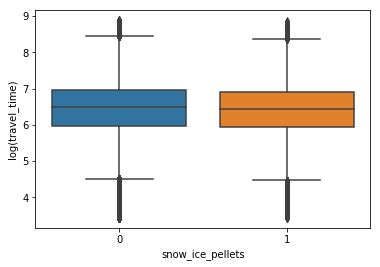

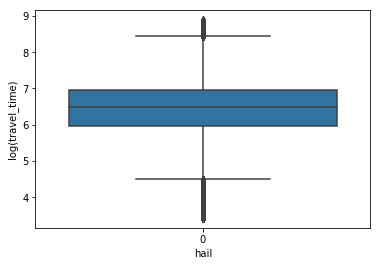

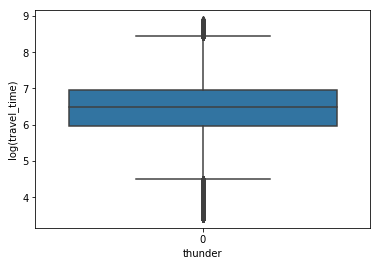

In [320]:
for i in box.columns:
    sns.boxplot(x = box[i], 
                y = np.log(df1['travel_time']))
    plt.ylabel('log(travel_time)')
    plt.show()

- According to above, hail and thunder only each has one value. Remove them
- visib, sndp and gust have missing values, and they are noted as 999.9 in the dataset. Something to pay attention to when running models
- Features with potential prediction powers: 
 - vendor_id
 - passenger_count
 - rate_code 
 - store_and_fwd_flag 
 - fog
 - snow_ice_pellets

In [321]:
df1 = df1.drop(labels = ['thunder', 'hail'],axis = 1)

In [271]:
df1.shape

(738786, 20)

### Scatter plots

In [62]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,temp,visib,wdsp,gust,max,min,prcp,fog,rain_drizzle,snow_ice_pellets
3,2,2016-02-13 13:44:09+00:00,2016-02-13 13:52:08+00:00,1,-73.999458,40.743900,1,N,-74.007759,40.732189,...,19.3,10.0,9.4,31.1,27.0,9.0,0.0,0,0,0
4,2,2016-02-12 15:26:00+00:00,2016-02-12 15:55:24+00:00,1,-73.968292,40.767811,1,N,-73.981239,40.727451,...,20.4,10.0,6.6,25.1,30.9,15.1,0.0,0,0,0
10,2,2016-06-05 22:24:43+00:00,2016-06-05 22:40:35+00:00,5,-73.873222,40.773849,1,N,-73.954933,40.778400,...,67.5,5.4,3.5,33.0,70.0,64.4,0.4,1,1,0
14,1,2016-02-13 10:38:08+00:00,2016-02-13 10:41:39+00:00,2,-73.982086,40.771366,1,N,-73.979378,40.781456,...,19.3,10.0,9.4,31.1,27.0,9.0,0.0,0,0,0
19,1,2016-06-05 17:57:02+00:00,2016-06-05 18:09:14+00:00,1,-73.960098,40.770447,1,N,-73.984749,40.757896,...,67.5,5.4,3.5,33.0,70.0,64.4,0.4,1,1,0


In [322]:
scatter = df1[['temp', 'wdsp', 'max', 'min', 'prcp', 
               'dropoff_latitude', 'pickup_latitude']]

In [323]:
scatter["wdsp"] = scatter["wdsp"].astype(float)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


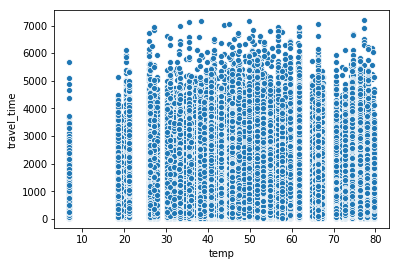

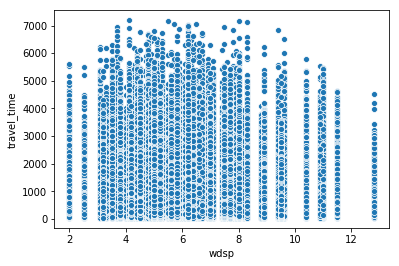

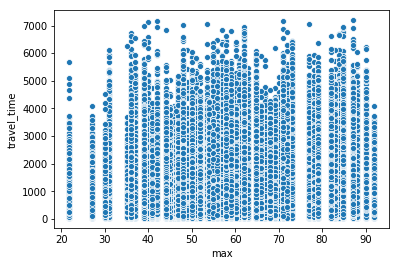

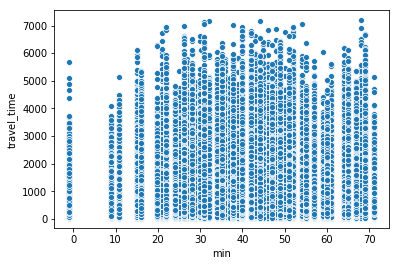

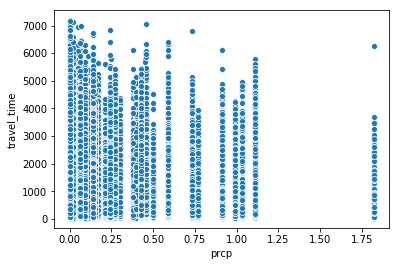

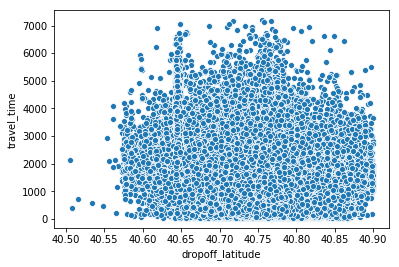

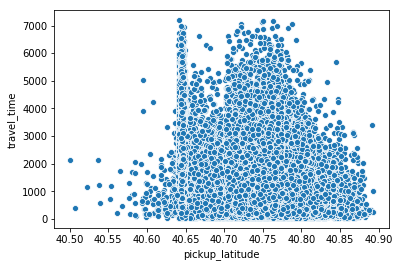

In [326]:
for i in scatter.columns:
    sns.scatterplot(x = scatter[i], 
                    y = df1['travel_time'])
    plt.ylabel('travel_time')
    plt.show()

### In conclusion
1. Without any sophisticated transformation/encoding, based on the original features, the below ones potentially have some predicting power based on visualizations:
- fog
- snow_ice_pellets

In [327]:
df2 = df1.copy()

In [328]:
df2.to_pickle("/Users/liyannie/Desktop/Sp_2019_courses/DS_Indus/project/liyan/df2.pkl")